### Modeling

In [1]:
import pandas as pd
import numpy as np
import statistics
import scipy.stats as stats
import seaborn as sns
import math
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error,confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
#Read file & assign to pandas dataframes
loans = pd.read_csv("../data/loans_cleaned.csv")

In [3]:
# Set up X and y
features = [x for x in loans.columns if x not in ['loan_status']]
X = loans[features]
y = loans['loan_status']

In [4]:
# Conduct a train/test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [5]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [6]:
# Instantiate model
lr = LogisticRegression()

In [7]:
# Fit model
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
# Generate predictions
preds = lr.predict(X_test)

In [9]:
# Generate confusion matrix
confusion_matrix(y_test, # True values.
                 preds)  # Predicted values

array([[1260,   26],
       [   0, 7888]], dtype=int64)

In [10]:
# Save tn/fp/fn/tp values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [11]:
cols = loans.columns
# Remove the loan_status column
train_cols = cols.drop("loan_status")
# Create a Dataframe named features containing only feature columns
features = loans[train_cols]
# Create a Series named target that contains just the target column (loan_status)
target = loans["loan_status"]
# Use the fit method of lr to fit a logistic regression to features and target
lr.fit(features, target)

C:\Users\retro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# Use the predict method of lr to make predictions on X_test?
predictions = lr.predict(X_test)

In [13]:
predictions = pd.Series(np.ones(loans.shape[0]))
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
predictions[tp_filter]

0        1.0
2        1.0
3        1.0
4        1.0
5        1.0
        ... 
36687    1.0
36688    1.0
36689    1.0
36690    1.0
36693    1.0
Length: 31519, dtype: float64

In [14]:
# False positives
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

In [15]:
predictions = cross_val_predict(lr, features, target, cv=3)
predictions = pd.Series(predictions)
# False positives
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])
# Rates
true_positive_rate_sensitivity = tp / (tp + fn)
true_negative_rate_specificity = tn / (tn + fp)
false_positive_rate = fp / (fp+tn)
false_negative_rate = fn / (fn+tp)
f1_score = 2*tp / (2*tp + fp + fn)


print(f'cross_val_Sensitivity: {round(true_positive_rate_sensitivity,5)}')
print(f'cross_val_Specificity: {round(true_negative_rate_specificity,5)}')
print(f'cross_val_false_positive_rate: {round(false_positive_rate,5)}')
print(f'cross_val_false_negative_rate: {round(false_negative_rate,5)}')
print(f'cross_val_f1_score: {round(f1_score,5)}')

C:\Users\retro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\retro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

cross_val_Sensitivity: 0.99965
cross_val_Specificity: 0.99478
cross_val_false_positive_rate: 0.00522
cross_val_false_negative_rate: 0.00035
cross_val_f1_score: 0.9994


C:\Users\retro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
lr = LogisticRegression(class_weight="balanced")
predictions = cross_val_predict(lr, features, target, cv=3)
predictions = pd.Series(predictions)

# False positives
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
true_positive_rate_sensitivity = tp / (tp + fn)
true_negative_rate_specificity = tn / (tn + fp)
false_positive_rate = fp / (fp+tn)
false_negative_rate = fn / (fn+tp)
f1_score = 2*tp / (2*tp + fp + fn)

print(f'LogisticRegression_class_weight_balanced_Sensitivity: {round(true_positive_rate_sensitivity,5)}')
print(f'LogisticRegression_class_weight_balanced_Specificity: {round(true_negative_rate_specificity,5)}')
print(f'LogisticRegression_class_weight_balanced_false_positive_rate: {round(false_positive_rate,5)}')
print(f'LogisticRegression_class_weight_balanced_false_negative_rate: {round(false_negative_rate,5)}')
print(f'LogisticRegression_class_weight_balanced_f1_score: {round(f1_score,5)}')

C:\Users\retro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\retro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

LogisticRegression_class_weight_balanced_Sensitivity: 0.99927
LogisticRegression_class_weight_balanced_Specificity: 0.99633
LogisticRegression_class_weight_balanced_false_positive_rate: 0.00367
LogisticRegression_class_weight_balanced_false_negative_rate: 0.00073
LogisticRegression_class_weight_balanced_f1_score: 0.99933


C:\Users\retro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
penalty = {
    0: 10,
    1: 1
}

lr = LogisticRegression(class_weight=penalty)
predictions = cross_val_predict(lr, features, target, cv=3)
predictions = pd.Series(predictions)

# False positives
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
true_positive_rate_sensitivity = tp / (tp + fn)
true_negative_rate_specificity = tn / (tn + fp)
false_positive_rate = fp / (fp+tn)
false_negative_rate = fn / (fn+tp)
f1_score = 2*tp / (2*tp + fp + fn)

print(f'LogisticRegression_class_weight_penalty_Sensitivity: {round(true_positive_rate_sensitivity,5)}')
print(f'LogisticRegression_class_weight_penalty_Specificity: {round(true_negative_rate_specificity,5)}')
print(f'LogisticRegression_class_weight_penalty_false_positive_rate: {round(false_positive_rate,5)}')
print(f'LogisticRegression_class_weight_penalty_false_negative_rate: {round(false_negative_rate,5)}')
print(f'LogisticRegression_class_weight_f1_score: {round(f1_score,5)}')

C:\Users\retro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\retro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

LogisticRegression_class_weight_penalty_Sensitivity: 0.99845
LogisticRegression_class_weight_penalty_Specificity: 0.99768
LogisticRegression_class_weight_penalty_false_positive_rate: 0.00232
LogisticRegression_class_weight_penalty_false_negative_rate: 0.00155
LogisticRegression_class_weight_f1_score: 0.99903


C:\Users\retro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
#Random Forest Classifier Modeling
rf = RandomForestClassifier(class_weight="balanced", random_state=1)
#predictions = cross_val_predict(rf, features, target, cv=3)
rf.fit(features, target)
predictions = rf.predict(X_test)
predictions = pd.Series(predictions)

# False positives
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
true_positive_rate_sensitivity = tp / (tp + fn)
true_negative_rate_specificity = tn / (tn + fp)
false_positive_rate = fp / (fp+tn)
false_negative_rate = fn / (fn+tp)
f1_score = 2*tp / (2*tp + fp + fn)
Accuracy = (tp + tn) / (tp + fp + tn + fn)

print(f'RandomForest_Sensitivity: {round(true_positive_rate_sensitivity,5)}')
print(f'RandomForest_Specificity: {round(true_negative_rate_specificity,5)}')
print(f'RandomForest_false_positive_rate: {round(false_positive_rate,5)}')
print(f'RandomForest_false_negative_rate: {round(false_negative_rate,5)}')
print(f'RandomForest_f1_score: {round(f1_score,5)}')

RandomForest_Sensitivity: 0.0
RandomForest_Specificity: 1.0
RandomForest_false_positive_rate: 0.0
RandomForest_false_negative_rate: 1.0
RandomForest_f1_score: 0.0


In [19]:
#Check data shape
predictions.shape

(9174,)

In [20]:
predictions.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
dtype: int64

In [21]:
#Check data shape
loans.shape

(36694, 53)

In [22]:
#Display header
loans = loans.reset_index(drop=True)

In [23]:
#Concat data
loans = pd.concat([loans, predictions], axis=1 )

In [24]:
#Display header
loans.shape

(36694, 54)

In [25]:
#Drop rows with na and reset index
loans = loans.dropna()
loans.reset_index(drop=True)

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,loan_status,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,interaction,0,0
0,0,5000.0,5000.0,4975.0,10.65,162.87,1.0,10.0,24000.0,1,...,0,0,0,0,0,1,0,294.4725,1,0.0
1,1,2500.0,2500.0,2500.0,15.27,59.83,1.0,0.0,30000.0,0,...,0,0,0,0,0,0,1,15.2700,0,0.0
2,2,2400.0,2400.0,2400.0,15.96,84.33,1.0,10.0,12252.0,1,...,0,0,1,0,0,1,0,139.1712,1,0.0
3,3,10000.0,10000.0,10000.0,13.49,339.31,1.0,10.0,49200.0,1,...,1,0,0,0,0,1,0,269.8000,1,0.0
4,4,5000.0,5000.0,5000.0,7.90,156.46,1.0,3.0,36000.0,1,...,0,0,0,0,1,1,0,88.4800,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9169,9169,5550.0,5550.0,5550.0,8.49,175.18,1.0,10.0,80000.0,1,...,0,1,0,0,0,1,0,228.2961,1,0.0
9170,9170,14675.0,14675.0,14675.0,16.89,363.85,0.0,0.0,25164.0,0,...,0,0,0,0,0,0,1,327.8349,0,0.0
9171,9171,15000.0,15000.0,15000.0,15.23,358.67,1.0,3.0,99000.0,0,...,0,0,0,0,0,0,1,180.3232,0,0.0
9172,9172,14000.0,14000.0,14000.0,16.89,347.11,0.0,8.0,50000.0,1,...,1,0,0,0,0,0,1,343.3737,1,0.0


In [26]:
#Rename column
loans.rename(columns={0:"prediction"}, inplace=True)

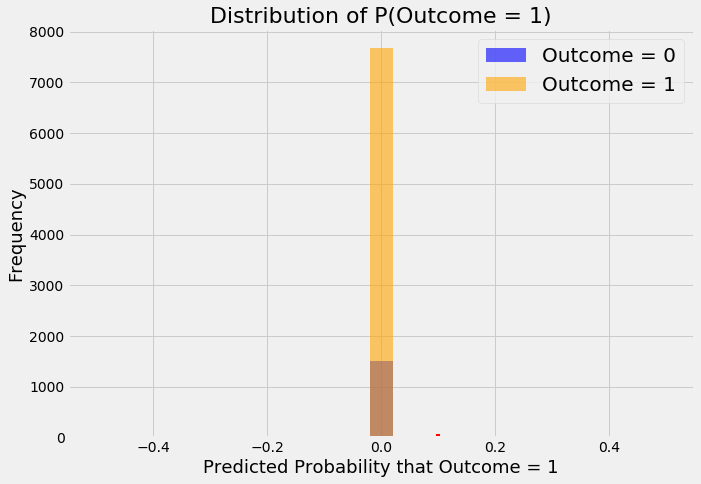

In [27]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(loans[loans["loan_status"] == 0]['prediction'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(loans[loans["loan_status"] == 1]['prediction'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Add vertical line at P(Outcome = 1) = 0.1.
plt.vlines(x=0.1,
           ymin = 0,
           ymax = 65,
           color='r',
           linestyle = '--')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Create legend.
plt.legend(fontsize=20);

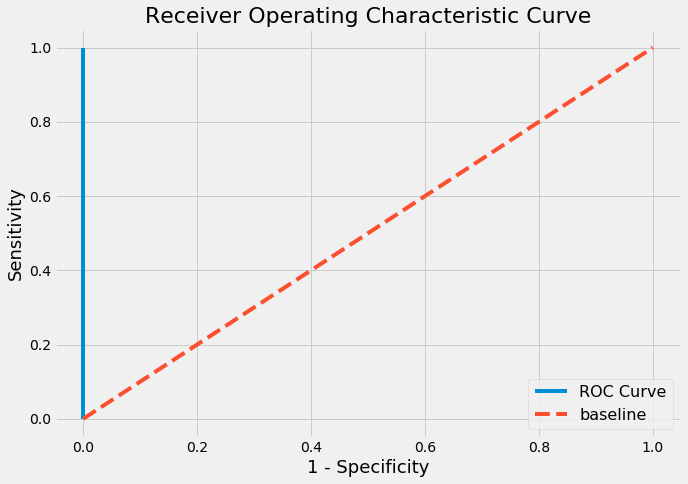

In [28]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, loan_status, predictions, threshold):
    true_positive = loans[(loans["loan_status"] == 1) & (loans[predictions] >= threshold)].shape[0]
    false_negative = loans[(loans["loan_status"] == 1) & (loans[predictions] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, loan_status, predictions, threshold):
    true_negative = loans[(loans["loan_status"] == 0) & (loans[predictions] <= threshold)].shape[0]
    false_positive = loans[(loans["loan_status"] == 0) & (loans[predictions] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(loans, "loan_status", 'prediction', prob) for prob in thresholds]
fpr_values = [FPR(loans, "loan_status", 'prediction', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);